# THE SPARKS FOUNDATION¶

# TASK 2:- Predict the optimum number of clusters for IRIS dataset and represent it visually

# NAME:- Gautam Malik

## IMPORTING MODULES

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

## Importing Dataset

In [2]:
data=pd.read_csv('iris.csv')
data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


# Vizulizing SepelLength and SepelWidth

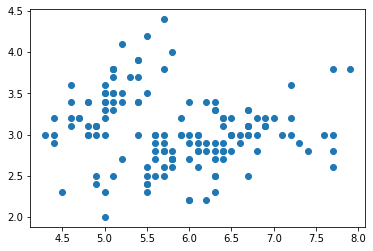

In [71]:
plt.scatter(data.SepalLengthCm,data.SepalWidthCm)


In [4]:
X=data.drop(['Species','Id'],axis=1)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Elbow Method

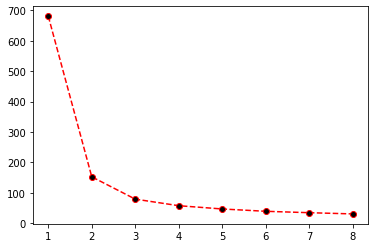

In [6]:

a=[]
for i in range(1,9):
    m=KMeans(n_clusters=i,max_iter=500,random_state=1)
    m.fit(X)
    a.append(m.inertia_)
    
plt.plot(range(1,9) , a , marker='o' ,linestyle='dashed' , color='red' , markerfacecolor='black')    

# Making Kmeans Clustring Model

In [7]:
model=KMeans(n_clusters=3)
kmns=model.fit_predict(X)

In [8]:
kmns=pd.Series(kmns,name='cluster')
data1=pd.concat([data,kmns],axis=1,)

In [11]:
data1.iloc[:,5:]

,Species,cluster
0,Iris-setosa,0
1,Iris-setosa,0
2,Iris-setosa,0
3,Iris-setosa,0
4,Iris-setosa,0
...,...,...
145,Iris-virginica,1
146,Iris-virginica,2
147,Iris-virginica,1
148,Iris-virginica,1


# Vizulizing KMeans Output

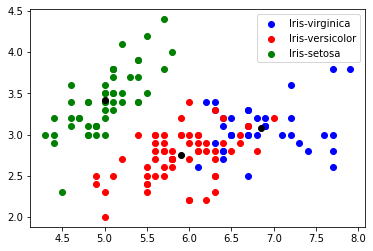

In [76]:
d1=data1[data1['cluster'] == 1]
d2=data1[data1['cluster'] == 2]
d3=data1[data1['cluster'] == 0]


plt.scatter(d1.SepalLengthCm,d1.SepalWidthCm,color='blue' , label='Iris-virginica')
plt.scatter(d2.SepalLengthCm,d2.SepalWidthCm,color='red' , label='Iris-versicolor')
plt.scatter(d3.SepalLengthCm,d3.SepalWidthCm,color='green' , label='Iris-setosa')

plt.scatter(model.cluster_centers_[:,0] , model.cluster_centers_[:,1] , color='black')

plt.legend()

In [66]:
silhouette_score(X,data1.cluster)

0.5525919445499757

# Hiararchial Clustering

In [59]:
m1=AgglomerativeClustering(n_clusters=3)
agmo=m1.fit_predict(X)

In [61]:
agmo=pd.Series(agmo,name='cluster')
data2=pd.concat([data,agmo],axis=1,)

In [62]:
data2.iloc[:,5:]

,Species,cluster
0,Iris-setosa,1
1,Iris-setosa,1
2,Iris-setosa,1
3,Iris-setosa,1
4,Iris-setosa,1
...,...,...
145,Iris-virginica,2
146,Iris-virginica,0
147,Iris-virginica,2
148,Iris-virginica,2


# Vizulizing Hiararchial Output

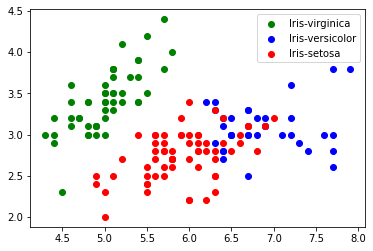

In [68]:
df1=data2[data2['cluster'] == 1]
df2=data2[data2['cluster'] == 2]
df3=data2[data2['cluster'] == 0]


plt.scatter(df1.SepalLengthCm, df1.SepalWidthCm,color='green' , label='Iris-virginica')
plt.scatter(df2.SepalLengthCm, df2.SepalWidthCm,color='blue' , label='Iris-versicolor')
plt.scatter(df3.SepalLengthCm, df3.SepalWidthCm,color='red' , label='Iris-setosa')

plt.legend()

In [67]:
silhouette_score(X,data2.cluster)

0.5540972908150553

# Comparing Both Outputs

Silhouette Cofficient of Kmeans Clustering : 0.5525919445499757
Silhouette Cofficient of Hiararchial Clustering : 0.5540972908150553


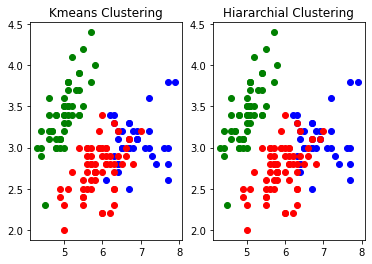

In [91]:
plt.subplot(1,2,2)

plt.scatter(df1.SepalLengthCm, df1.SepalWidthCm,color='green' , label='Iris-virginica')
plt.scatter(df2.SepalLengthCm, df2.SepalWidthCm,color='blue' , label='Iris-versicolor')
plt.scatter(df3.SepalLengthCm, df3.SepalWidthCm,color='red' , label='Iris-setosa')
plt.title('Hiararchial Clustering')


plt.subplot(1,2,1)

plt.scatter(d1.SepalLengthCm,d1.SepalWidthCm,color='blue' , label='Iris-virginica')
plt.scatter(d2.SepalLengthCm,d2.SepalWidthCm,color='red' , label='Iris-versicolor')
plt.scatter(d3.SepalLengthCm,d3.SepalWidthCm,color='green' , label='Iris-setosa')
plt.title('Kmeans Clustering')


print('Silhouette Cofficient of Kmeans Clustering :',silhouette_score(X,data1.cluster))
print('Silhouette Cofficient of Hiararchial Clustering :',silhouette_score(X,data2.cluster))

In this Hiararchial Clustering is doing better work than Kmeans Clustering